names: Ricardo Leão Cardoso, Annabelle Ducret, Alexandrine Jasmine Annick Dif


<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('ecg.dat')
# sampling frequency of the signal is 500 Hz
fs = 500
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an ECG signal with visible PQRST complex.  If you zoom on the<br>
    signal plot you can see that there is a 50Hz perturbation due to the power network.<br>
    The objective is to remove this component without altering the PQRST complex.<br>
    Several filtering techniques are used. Comment the advantages and<br>
    disadvantages.<br>



 <br>
    Plot time signal and FFT.<br>
    Q: Comment the figures.<br>
    The power line frequency (50Hz) has almost no visual effect on QRS peak. However, the P and T waves are clearly affected by it (Figure 1, middle sub-figure), which could make the detection of their onset less precise. The no effect on QRS peak is certainly due to the signal-to-noise ratio. The FFT graph, shows that a low-pass filter should be applied with a cut-off frequency around 40 Hz to remove all the high frequencies, especially the one of the power line (peak at 50Hz). This low-pass filter would cause attenuation of the amplitude of the sharp peaks and some oscillation because of the truncation of the initial spectrum. No clear lower cut-off frequency can be determined from the FFT graph, as the spectrum of the signal is spread around a wide range of low frequencies. 


Compute the FFT of the signal

In [3]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

(0.0, 70.0)

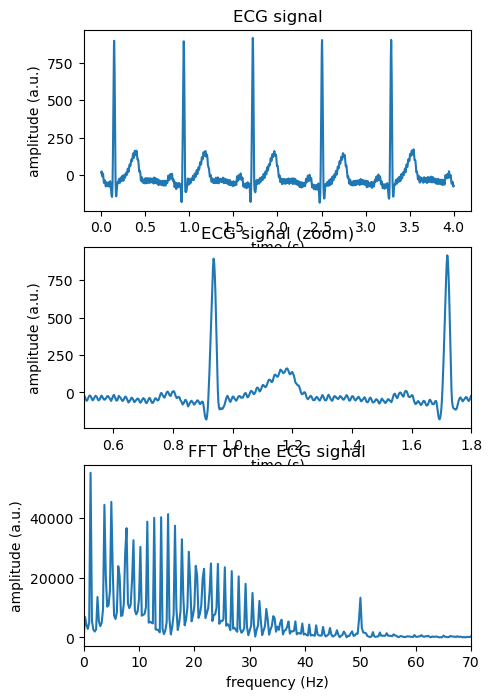

In [4]:
py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.subplot(3,1,2)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal (zoom)')
py.xlim(0.5, 1.8),
py.subplot(3,1,3)
py.plot(f_fft, abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the ECG signal')
py.xlim(0,70)


 <br>
    IIR filter:<br>
    Define a filter with a pass-band up to 35 Hz and a stop band from 50Hz.<br>
    Maximum attenuation in passband 3 dB<br>
    Minimum attenuation in stopband 40 dB<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...)<br>
    The graph shows a delay of around 0.05s (phase shift due to the filter) compared to the initial signal. It is less noisy than without the filter. The power line frequency (50Hz) is attenuated, which allows a better detection of the QRS peak, P and T waves. The filter is not a linear phase one and the transition between the pass-band and the stop band is sharp, so distortions are observed (ex : Before the T wave, where a plateau is supposed to be, oscillations are seen. They are the result of the impulse response of the filter). This is probably the reason why the auricular contraction is bumpy instead of round. There are also important differences of amplitude in some parts of the graph, especially at the QRS peak (smaller) which was expected (cf. Q1). The plateau expected before the P-wave and after the T-wave is smooth (50Hz frequency attenuated).



 <br>
    Q: Based on the FFT spectrum comment the selection of the pass and stop band<br>
       frequencies.<br>
    The low-band and stop-band frequencies are here to avoid the 50Hz peak which is due to power line and to allow the normal ECG frequency to be visualized (max frequency ≃ 30Hz for QRS complex).

Analogic limit of the passband frequency

In [5]:
f_pass = 35
# Analogic limit of the stopband frequency
f_stop = 50
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_f = sp.lfilter(b ,a, x)

(0.5, 1.8)

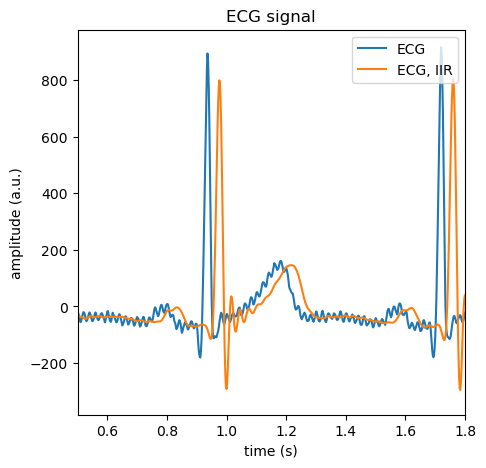

In [6]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)


 <br>
    IIR filter (zero phase):<br>
    Use the same filter but apply a zero phase approach.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...)<br>
    With the zero-phase approach, no delay appears between the curves. However, some distortion is created, especially on the QRS complex. One of them is that the peak with the filter is lower. IIR filter with zero phase leads to a better approximation than the simple IIR filter. The plateau before the T-wave is still oscillating a bit, but it is better. However, the plateau supposed to be before the QRS peak is also oscillating a bit, which was not the case with the previous filter. The removal of the frequencies higher than 35Hz, is causing the oscillations in the two cases (it is not the power line noise but, as discussed in Q1 and Q2, oscillations due to truncation of the spectrum of the initial signal and the impulse response of the filter).


Filter the signal

In [7]:
x_f = sp.filtfilt(b ,a, x)

(0.5, 1.8)

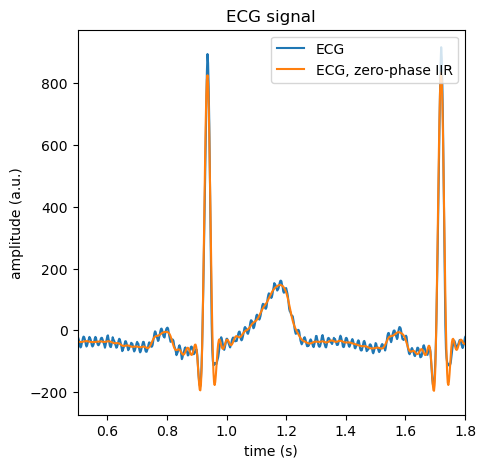

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, zero-phase IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)


<br>
    Linear phase FIR filter.<br>
    Define a FIR filter with the same properties.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...).<br>
    This filter is also attenuating the power line frequency (50Hz). The plateaus are better after the P-wave and the QRS-complex (fewer oscillations) than in the previous graphs. However, the delay is constant and also bigger than in the previous graphs (it corresponds to the delay of 50 samples as the filter length is 101). The curves are almost the same. The plateau expected before the P-wave and after the T-wave is still a bit affected by the power line frequency because in contrary to the IRR filters (cf Q2), in the linear phase FIR filter, transition between pass-band and stop-band is less sharp. Adding more coefficients to the filter would attenuate the 50Hz frequency more. 


length of the filter

In [9]:
l_fir = 101
# compute the filter coefficients using least square approach
b = sp.firls(l_fir, [0, f_pass_N, f_stop_N, 1], [1, 1, 1/100, 1/100])
a = [1]
# filter the signal
x_f = sp.lfilter(b, a, x)

(0.5, 1.8)

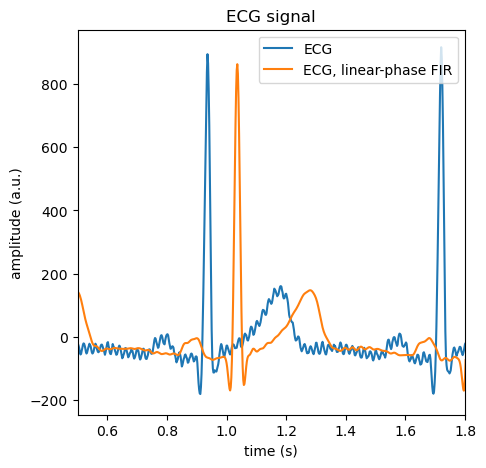

In [10]:
py.figure(4, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, linear-phase FIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)